<a href="https://colab.research.google.com/github/bambadij/AIPND_udacity_aws/blob/master/Ml4SCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML4SCI Genie GSoC 2024 Tasks


 #### Common Task 1:Auto-encoder of the quart/gluon events


###  Description
The goal is to develop an auto-encoder model capable of caputring the essential featutres of Quart/Gluon events from the provided dataset.By training the auto-encoder,we aim to learn a compact representatition of the input images that can effectively reconstruct original events

### Objective
Train an auto-encoder to learn representations Quart/Gluon events based three images channels (ECAL,HCAL,and Tracks)

### Data Understanding

#### Installation

Setup

In [1]:
#import package
%pip install h5py

#### Import packages/Librairies

In [ ]:
import h5py
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import cv2

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
max_train_examples = 5000
max_valid_examples = 1000
max_test_examples = 1000
image_height = 128
image_width = 128
num_channels = 3



In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/google summer/quark-gluon_data-set_n139306.hdf5'

X_jets_train =None
X_jets_test = None
X_jets_valid=None
m0_train =None
m0_test = None
m0_valid =None

# Specify the file path with only one occurrence of 'google summer'
with h5py.File(file_path, 'r') as file:
    X_jets_train = file['X_jets'][:max_train_examples]
    m0_train = file['m0'][:max_train_examples]
    pt_train = file['pt'][:max_train_examples]
    y_train = file['y'][:max_train_examples]

    X_jets_valid = file['X_jets'][max_train_examples:max_train_examples+max_valid_examples]
    m0_valid = file['m0'][max_train_examples:max_train_examples+max_valid_examples]
    pt_valid = file['pt'][max_train_examples:max_train_examples+max_valid_examples]
    y_valid = file['y'][max_train_examples:max_train_examples+max_valid_examples]

    X_jets_test = file['X_jets'][max_train_examples+max_valid_examples:max_train_examples+max_valid_examples+max_test_examples]
    m0_test = file['m0'][max_train_examples+max_valid_examples:max_train_examples+max_valid_examples+max_test_examples]
    pt_test = file['pt'][max_train_examples+max_valid_examples:max_train_examples+max_valid_examples+max_test_examples]
    y_test = file['y'][max_train_examples+max_valid_examples:max_train_examples+max_valid_examples+max_test_examples]


In [ ]:
X_jets_train.shape

(5000, 125, 125, 3)

In [ ]:
X_jets_valid.shape

(1000, 125, 125, 3)

In [ ]:
# Redimensionner toutes les images d'un ensemble de données à la taille attendue
def resize_images(images, new_size):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, new_size)  # Redimensionner l'image
        resized_images.append(resized_img)
    return resized_images



In [ ]:
# Redimensionner les images d'entraînement à la taille attendue
new_size = (128, 128)  # Taille attendue par le modèle
X_jets_train_resized = resize_images(X_jets_train, new_size)

# Redimensionner les images de validation à la taille attendue
X_jets_valid_resized = resize_images(X_jets_valid, new_size)
X_jets_train_resized = np.array(X_jets_train_resized)
X_jets_valid_resized = np.array(X_jets_valid_resized)
# Entraîner le modèle avec les images redimensionnées


In [ ]:
X_jets_valid_resized.shape

(1000, 128, 128, 3)

In [ ]:
X_jets_train_resized.shape

(5000, 128, 128, 3)

In [ ]:
# Définir l'entrée du modèle
input_img = Input(shape=(128, 128, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Pas d'activation pour une sortie linéaire

# Créer le modèle
autoencoder = Model(input_img, decoded)

# Compiler le modèle avec la perte quadratique moyenne
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Afficher un résumé du modèle
autoencoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        3692

In [ ]:
# Entraînement de l'auto-encodeur
history = autoencoder.fit(X_jets_train_resized, X_jets_train_resized,
                          epochs=10,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_jets_valid_resized, X_jets_valid_resized))


Epoch 1/10
157/157 [==============================] - 14s 43ms/step - loss: 0.0206 - val_loss: 3.4516e-06
Epoch 2/10
157/157 [==============================] - 6s 36ms/step - loss: 2.4446e-06 - val_loss: 3.3096e-06
Epoch 3/10
157/157 [==============================] - 6s 35ms/step - loss: 2.2997e-06 - val_loss: 3.1763e-06
Epoch 4/10
157/157 [==============================] - 6s 37ms/step - loss: 2.1945e-06 - val_loss: 3.1010e-06
Epoch 5/10
157/157 [==============================] - 6s 36ms/step - loss: 2.1416e-06 - val_loss: 3.0662e-06
Epoch 6/10
157/157 [==============================] - 6s 38ms/step - loss: 2.1170e-06 - val_loss: 3.0495e-06
Epoch 7/10
157/157 [==============================] - 6s 36ms/step - loss: 2.1048e-06 - val_loss: 3.0408e-06
Epoch 8/10
157/157 [==============================] - 6s 38ms/step - loss: 2.0980e-06 - val_loss: 3.0357e-06
Epoch 9/10
157/157 [==============================] - 6s 37ms/step - loss: 2.0940e-06 - val_loss: 3.0325e-06
Epoch 10/10
157/157 [=

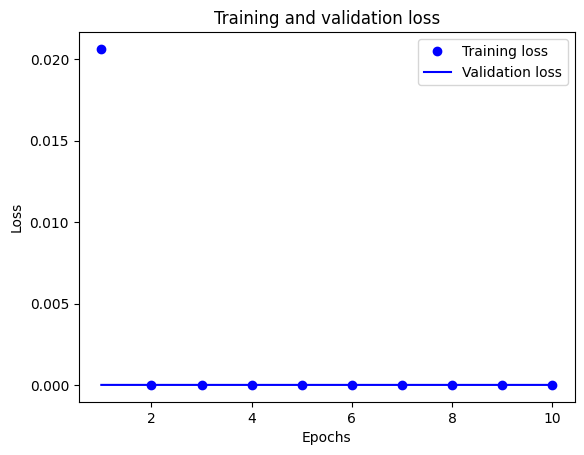

In [ ]:
import matplotlib.pyplot as plt

# Récupérer les valeurs de perte d'entraînement et de validation depuis l'historique
loss = history.history['loss']
val_loss = history.history['val_loss']

# Tracer la perte d'entraînement et de validation
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [ ]:
# Définir le callback ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)


In [ ]:
# Entraîner le modèle en utilisant le callback
history = autoencoder.fit(X_jets_train_resized, X_jets_train_resized,
                          epochs=10,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_jets_valid_resized, X_jets_valid_resized),
                          callbacks=[reduce_lr])

Epoch 1/10
157/157 [==============================] - 7s 43ms/step - loss: 2.0897e-06 - val_loss: 3.0290e-06 - lr: 0.0010
Epoch 2/10
157/157 [==============================] - 6s 36ms/step - loss: 2.0884e-06 - val_loss: 3.0279e-06 - lr: 0.0010
Epoch 3/10
157/157 [==============================] - 6s 37ms/step - loss: 2.0875e-06 - val_loss: 3.0272e-06 - lr: 0.0010
Epoch 4/10
157/157 [==============================] - 6s 36ms/step - loss: 2.0868e-06 - val_loss: 3.0266e-06 - lr: 0.0010
Epoch 5/10
157/157 [==============================] - 6s 37ms/step - loss: 2.0863e-06 - val_loss: 3.0261e-06 - lr: 0.0010
Epoch 6/10
157/157 [==============================] - 6s 38ms/step - loss: 2.0859e-06 - val_loss: 3.0257e-06 - lr: 0.0010
Epoch 7/10
157/157 [==============================] - 6s 38ms/step - loss: 2.0857e-06 - val_loss: 3.0256e-06 - lr: 2.0000e-04
Epoch 8/10
157/157 [==============================] - 6s 37ms/step - loss: 2.0856e-06 - val_loss: 3.0256e-06 - lr: 2.0000e-04
Epoch 9/10
157/1

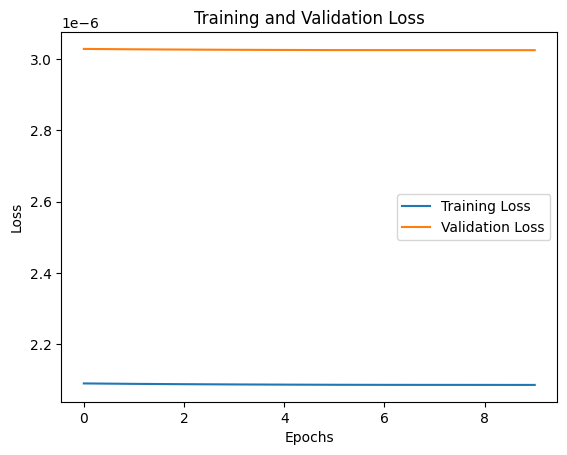

In [ ]:
import matplotlib.pyplot as plt

# Tracer les courbes de perte
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
